<a href="https://colab.research.google.com/github/tejas-52/Oasis-Data-Science-Internship/blob/main/machine_learning_model_to_classify_Iris_flower_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Objective**

**The objective of this project is to develop a robust and accurate machine learning model capable of classifying iris flowers into one of the three species: Setosa, Versicolor, and Virginica, based on their measured characteristics (sepal length, sepal width, petal length, and petal width). By leveraging the Iris dataset and employing techniques such as data preprocessing, feature scaling, and model evaluation, we aim to achieve a high level of classification accuracy. Additionally, we will evaluate the model's performance using appropriate metrics and visualize the importance of each feature in the classification process. This project serves as an exercise in applying machine learning methodologies to a well-known classification problem, thereby enhancing understanding and proficiency in data science practices.t**

# Import Library-


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Import Data

In [16]:
url = 'https://github.com/tejas-52/Oasis-Data-Science-Internship/raw/main/Iris.csv'
iris_data = pd.read_csv(url)

In [9]:
# Display the first few rows of the dataset
print(iris_data.head())

# Get a summary of the dataset
print(iris_data.info())

# Check for missing values
print(iris_data.isnull().sum())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
Id             

# Data Preprocessing

In [10]:
# Drop the 'Id' column as it's not necessary for classification
iris_data = iris_data.drop(columns=['Id'])

# Separate features and target variable
X = iris_data.drop(columns=['Species'])
y = iris_data['Species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train the Model

In [11]:
# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Evaluate the Model

In [12]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Accuracy Score:
1.0


# Visualize Results

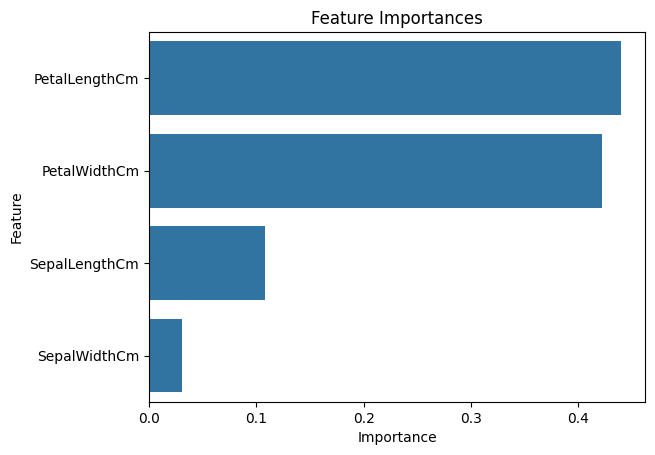

In [18]:
# Get feature importances
feature_importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()


# Save the Model (Optional)

In [20]:
import joblib

# Save the model
joblib.dump(model, 'iris_model.pkl')

# Load the model
# model = joblib.load('iris_model.pkl')


['iris_model.pkl']

# Explanation of the Project



This project involves building a machine learning model to classify iris flowers into one of three species: Setosa, Versicolor, and Virginica. The classification is based on four key features: sepal length, sepal width, petal length, and petal width. The project leverages the well-known Iris dataset, which is commonly used for benchmarking classification algorithms.

Here's a detailed breakdown of the project's steps:

#### 1. **Setup and Import Libraries**
We start by setting up the environment in Google Colab and importing necessary libraries such as Pandas for data manipulation, Numpy for numerical operations, Matplotlib and Seaborn for data visualization, and Scikit-learn for building and evaluating the machine learning model.

#### 2. **Load the Dataset**
The dataset is loaded directly from a provided URL. The dataset is in CSV format, and we use Pandas to read it into a DataFrame. This dataset contains measurements of iris flowers along with their species.

#### 3. **Explore the Dataset**
Exploratory Data Analysis (EDA) is performed to understand the structure and contents of the dataset. We inspect the first few rows, check for any missing values, and get a summary of the data to understand its characteristics.

#### 4. **Data Preprocessing**
Data preprocessing involves several steps:
   - Dropping unnecessary columns (e.g., the 'Id' column).
   - Separating the features (measurements) from the target variable (species).
   - Splitting the data into training and testing sets to evaluate the model's performance.
   - Standardizing the feature values to ensure they have a mean of 0 and a standard deviation of 1, which helps in improving the performance of many machine learning algorithms.

#### 5. **Train the Model**
A Random Forest Classifier, which is an ensemble learning method, is chosen for its robustness and accuracy. The model is trained on the training dataset, learning the relationships between the features and the target species.

#### 6. **Evaluate the Model**
The trained model is then evaluated on the testing dataset. Several metrics are used for evaluation:
   - **Confusion Matrix:** Shows the number of correct and incorrect predictions for each class.
   - **Classification Report:** Provides precision, recall, and F1-score for each class.
   - **Accuracy Score:** The overall accuracy of the model.

These metrics help in understanding how well the model performs in classifying the iris species.

#### 7. **Visualize Results**
(Optional) Feature importances are visualized to understand which features contribute the most to the model's decisions. This is done using a bar plot, providing insights into the significance of each measurement in the classification process.

#### 8. **Save the Model**
(Optional) The trained model is saved using Joblib, allowing for future use without the need to retrain. This step is useful for deployment in a real-world application.

### Summary

The project demonstrates the end-to-end process of building a machine learning model for a classification task, from data loading and preprocessing to model training, evaluation, and visualization. It serves as a practical exercise in applying machine learning techniques to solve a specific problem, enhancing understanding and proficiency in data science. By successfully classifying iris flowers, we showcase the effectiveness of machine learning in making accurate predictions based on given data.